#Data Set (Assignment 1)

I chose 15 Asset Managament firms with market cap > $100M. I already checked whether each firm has available historical closing data for a period of at least 5 years.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
tickers = ['BX', #Blackstone
           'BLK',#BlackRock
           'BN', #Brookfield Corporation
           'APO', #Apollo Global Management
           'ARES', #Ares Management Corporation
           'AMP', #Ameriprise Financial
           'RJF', #Raymond James Financial
           'STT', #State Street Corporation
           'CG', #The Carlyle Group
           'KKR', #KKR
           'MNKS.L',#Monks Investment Trust
           'SDR.L', #Schroders plc
           'STJ.L', #St. James's Place plc
           'INVE-B.ST',#Investor AB
           'PSH.L']#Pershing Square Holdings Ltd
equity = yf.download(tickers, start = '2020-05-14', end = '2025-05-15')['Close']
equity.dropna(inplace = True)
equity

[*********************100%***********************]  15 of 15 completed


Ticker,AMP,APO,ARES,BLK,BN,BX,CG,INVE-B.ST,KKR,MNKS.L,PSH.L,RJF,SDR.L,STJ.L,STT
Date,,,,,,,,,,,,,,,
2020-05-14,111.908974,36.404255,28.201303,440.636902,23.815317,42.519753,20.293390,100.393349,23.543640,894.901001,1605.167114,38.331291,457.951965,793.574951,46.495171
2020-05-15,112.295624,35.823181,28.704908,454.372528,23.279007,42.914696,20.079592,102.837059,23.557924,903.900085,1653.142334,37.725605,462.192261,796.369995,46.248669
2020-05-18,121.455688,38.305893,29.592594,456.760590,23.947453,45.015480,21.413673,107.545082,24.624846,960.893738,1735.099976,40.148354,473.725861,823.521118,49.691189
2020-05-19,118.334808,38.076992,29.191431,443.290283,23.247917,44.418850,21.345255,108.172836,24.643890,953.894531,1739.097900,38.850456,481.697632,834.301819,48.229183
2020-05-20,121.179512,39.608883,29.848663,449.959015,23.216824,45.595284,22.174782,107.769287,25.425035,959.893860,1757.088501,40.673691,478.475037,833.503235,49.623192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08,489.000000,132.718262,165.850006,928.640015,57.610001,139.809998,41.259998,283.399994,118.543991,1186.000000,3633.874023,145.539993,340.000000,1024.000000,94.059998
2025-05-09,492.179993,131.990845,164.949997,923.440002,56.700001,139.389999,42.040001,284.149994,117.895004,1186.000000,3611.874756,145.369995,340.799988,1024.500000,93.809998
2025-05-12,515.719971,142.941910,172.570007,958.030029,58.700001,149.000000,45.619999,294.450012,125.220001,1220.000000,3761.869385,151.580002,347.399994,1063.500000,96.000000


In [ ]:
log_diff = np.log(equity/equity.shift(1)).dropna()
returns = 100 * log_diff
returns

Ticker,AMP,APO,ARES,BLK,BN,BX,CG,INVE-B.ST,KKR,MNKS.L,PSH.L,RJF,SDR.L,STJ.L,STT
Date,,,,,,,,,,,,,,,
2020-05-15,0.344909,-1.609046,1.769993,3.069622,-2.277699,0.924559,-1.059127,2.404983,0.060652,1.000573,2.945005,-1.592752,0.921665,0.351590,-0.531577
2020-05-18,7.841460,6.700855,3.045600,0.524197,2.830999,4.779211,6.432570,4.476434,4.429366,6.114500,4.838711,6.224239,2.464785,3.352530,7.179495
2020-05-19,-2.603153,-0.599353,-1.364892,-2.993456,-2.964641,-1.334250,-0.320020,0.582016,0.077310,-0.731072,0.230150,-3.286161,1.668780,1.300604,-2.986333
2020-05-20,2.375505,3.944319,2.226485,1.493168,-0.133837,2.614035,3.812623,-0.373757,3.120532,0.626960,1.029165,4.586165,-0.671256,-0.095765,2.849400
2020-05-22,0.628572,0.487780,0.257023,0.892342,1.429316,-0.572948,3.374709,-0.375152,0.560428,0.933135,0.910552,-0.915912,0.177078,-0.119828,-5.383876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08,1.691113,2.933221,2.299375,0.895628,3.031071,2.660058,3.226478,1.135563,2.145318,1.872395,0.551883,1.620868,1.064471,1.823160,2.759388
2025-05-09,0.648200,-0.549599,-0.544142,-0.561534,-1.592195,-0.300859,1.872810,0.264294,-0.548969,0.000000,-0.607234,-0.116873,0.235014,0.048816,-0.266142
2025-05-12,4.671944,7.970576,4.516061,3.677329,3.466552,6.667055,8.172463,3.560700,6.027777,2.826456,4.068905,4.183137,1.918108,3.736067,2.307676


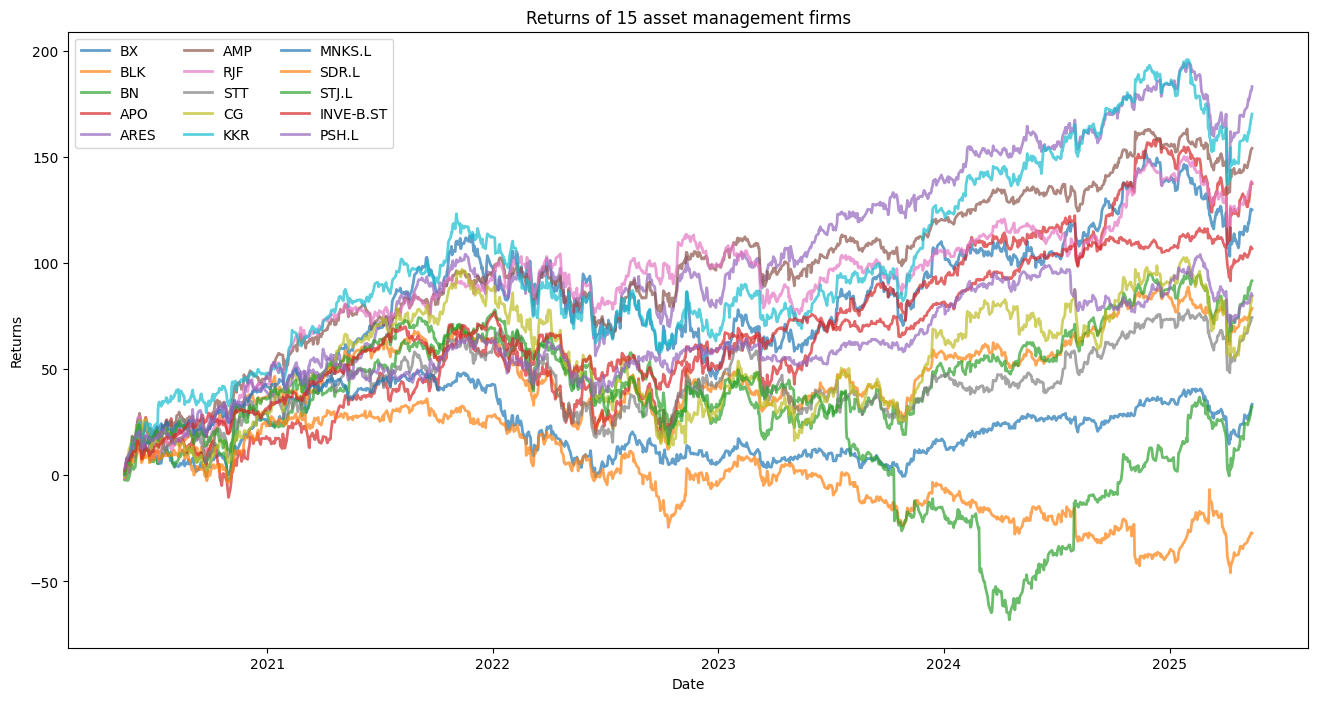

In [ ]:
returns_adjusted = returns.cumsum()
plt.figure(figsize = (16,8))
for company in tickers:
    plt.plot(returns_adjusted[company], label = company, alpha = 0.7, linewidth = 2)
plt.title('Returns of 15 asset management firms')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc = 'upper left', ncol = 3)
plt.show()

Overall, all firms witnessed a positive cumulative returns during the last 5 years, except for SDR.L (Schroders plc). This observation was resulted from several factors, namely decreasing profits, surging costs, and investor's shift from public to private market.

#Basic Statistics

In [ ]:
summary_stats = returns.describe()
kurtosis_row = pd.DataFrame([returns.kurtosis()], index=['kurtosis'])
skewness_row = pd.DataFrame([returns.skew()], index = ['skewness'])
summary_stats = pd.concat([summary_stats, kurtosis_row, skewness_row])
sorted_stats = summary_stats.sort_values(by='kurtosis', axis=1, ascending=False)
sorted_stats.transpose()

,count,mean,std,min,25%,50%,75%,max,kurtosis,skewness
Ticker,,,,,,,,,,
STJ.L,1206.0,0.026810,2.375292,-24.581492,-1.103968,0.041524,1.117264,22.153085,23.440216,-0.879864
SDR.L,1206.0,-0.022623,1.788351,-14.729852,-0.917814,0.000000,0.938159,11.889300,7.257790,-0.362864
ARES,1206.0,0.151754,2.240416,-16.813148,-1.016702,0.234684,1.452304,14.453906,5.695343,-0.539038
KKR,1206.0,0.141060,2.471986,-16.461327,-1.063805,0.157057,1.545432,15.594781,4.815407,-0.209490
BLK,1206.0,0.065177,1.711726,-8.027060,-0.864262,0.126940,0.988870,12.635796,4.726143,0.231108
CG,1206.0,0.069728,2.517336,-17.926001,-1.223277,0.238740,1.461828,12.068049,4.621618,-0.597342
APO,1206.0,0.113868,2.407064,-13.660488,-1.045578,0.146210,1.450325,15.133895,3.967635,-0.383607
STT,1206.0,0.061580,2.160444,-12.878455,-1.018841,0.122548,1.255089,11.908580,3.772410,-0.203272
AMP,1206.0,0.127641,1.910115,-10.215624,-0.818922,0.158179,1.155268,10.460913,3.418440,-0.102304


I chose to sort the firms based on kurtosis in order to illustrate the difference between general volatility and the occurrence of extreme, infrequent events—often referred to as 'black swan' events. This differentiation aligns with the conceptual shift from Modern Portfolio Theory (MPT) to Post-Modern Portfolio Theory (PMPT). While MPT treats all volatility equally, PMPT considers the situation in which investors are more sensitive to large, unexpected losses than to frequent, smaller fluctuations. For example, an investor with strong loss aversion may favor CG (The Carlyle Group), which exhibits significantly lower kurtosis and slightly higher volatility, over STJ.L (St. James’s Place plc),

#Sharpe and Sortino Ratio


I want to further delve into the difference between overall volatility and downside risk, so I tried to compute and compare Sharpe and Sortino Ratio of each firm.

## Sharpe Ratio


In [ ]:
trading_days_per_year = 1206/5
risk_free = 0.045
annualized_returns = log_diff.mean() * trading_days_per_year
annualized_volatility = log_diff.std() * np.sqrt(trading_days_per_year)
sharpe_ratio = (annualized_returns - risk_free)/ annualized_volatility
sharpe_ratio.sort_values(ascending = False)

,0
Ticker,
ARES,0.922631
AMP,0.886120
INVE-B.ST,0.795359
KKR,0.769020
RJF,0.763026
APO,0.614311
BX,0.542168
PSH.L,0.492014
BN,0.428079


##Sortino Ratio

In [ ]:
downside_returns = log_diff[log_diff <0]
downside_volatility = downside_returns.std() * np.sqrt(trading_days_per_year)
sortino_ratio = (annualized_returns - risk_free)/downside_volatility
sortino_ratio.sort_values(ascending = False)

,0
Ticker,
AMP,1.234177
ARES,1.215709
INVE-B.ST,1.128432
RJF,1.115327
KKR,1.043350
APO,0.820752
BX,0.769286
PSH.L,0.708135
BN,0.641587


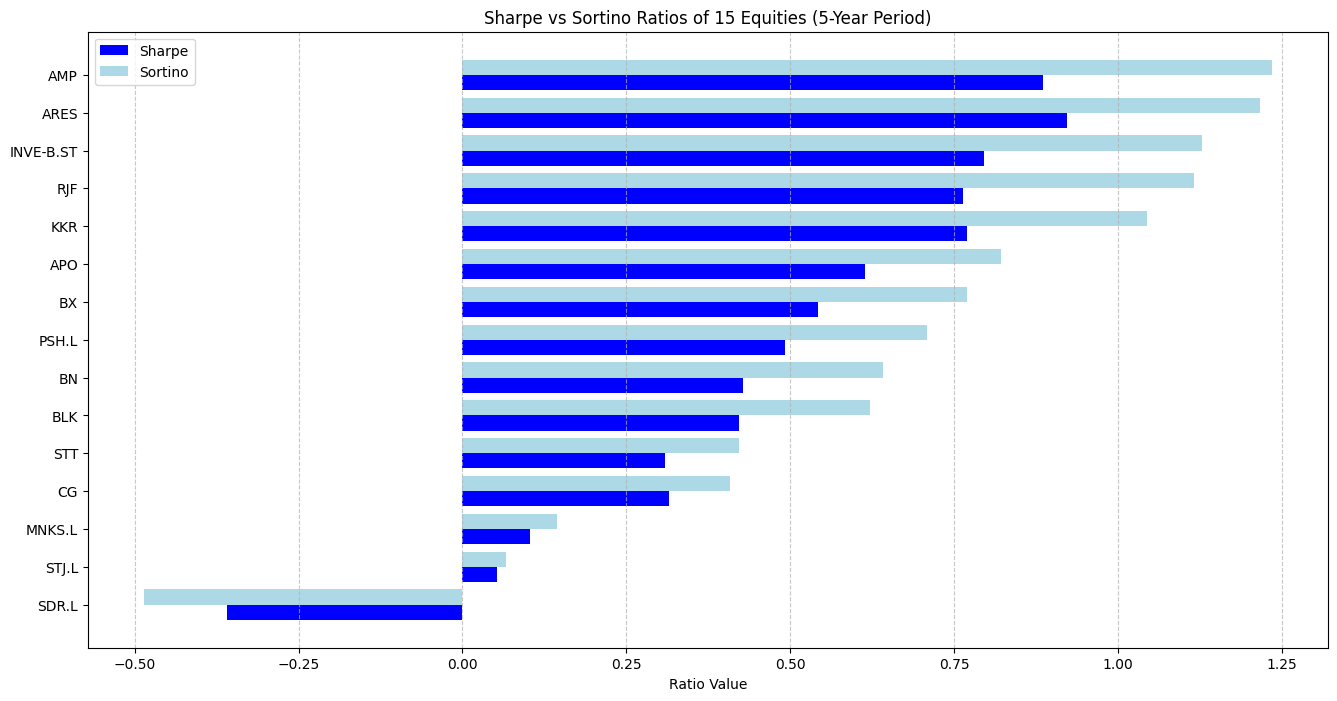

In [ ]:
ratio_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratio,'Sortino Ratio': sortino_ratio})
ratio_df = ratio_df.sort_values(by='Sortino Ratio')
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.4
x = np.arange(len(ratio_df))
ax.barh(x - bar_width/2, ratio_df['Sharpe Ratio'], height=bar_width, label='Sharpe', color='blue')
ax.barh(x + bar_width/2, ratio_df['Sortino Ratio'], height=bar_width, label='Sortino', color='lightblue')
ax.set_yticks(x)
ax.set_yticklabels(ratio_df.index)
ax.set_xlabel('Ratio Value')
ax.set_title('Sharpe vs Sortino Ratios of 15 Equities (5-Year Period)')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

When comparing the Sharpe and Sortino ratios, key differences become evident in assessing risk-adjusted performance. For instance, ARES exhibits the highest Sharpe ratio at 0.923, whereas AMP leads in terms of the Sortino ratio with a value of 1.234. Since the Sortino ratio focuses specifically on downside risk, firms with higher Sortino values are generally considered more favorable for constructing a risk-adjusted portfolio.

# CAPM Regression (Assignment 2)

In [ ]:
market = yf.download(['^GSPC'], start = '2020-05-14', end = '2025-05-14')['Close']
market_returns = 100*np.log(market/market.shift(1)).dropna()
rf_annual = yf.download(['^FVX'], start = '2020-05-14', end = '2025-05-14')['Close']
rf_daily = (rf_annual/252).dropna()
rf_daily

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,^FVX
Date,
2020-05-14,0.001190
2020-05-15,0.001222
2020-05-18,0.001500
2020-05-19,0.001381
2020-05-20,0.001310
...,...
2025-05-07,0.015369
2025-05-08,0.015849
2025-05-09,0.015821


In [ ]:
for company in tickers:
    def x_returns(company):
        company_returns = 100*np.log(equity[company]/equity[company].shift(1)).dropna()
        return company_returns

##Blackstone


In [ ]:
BX_CAPM = pd.DataFrame({'return_S&P' : market_returns['^GSPC'],
                        'risk_free' : rf_daily['^FVX'],
                       'return_BX': x_returns('BX'),
                       'exr_BX' : x_returns('BX') - rf_daily['^FVX'],
                       'exrsp' : market_returns['^GSPC'] - rf_daily['^FVX']}
)
BX_CAPM.dropna()

,return_S&P,risk_free,return_BX,exr_BX,exrsp
Date,,,,,
2020-05-15,0.391868,0.001222,0.924559,0.923337,0.390645
2020-05-18,3.101521,0.001500,4.779211,4.777711,3.100021
2020-05-19,-1.053975,0.001381,-1.334250,-1.335631,-1.055356
2020-05-20,1.651399,0.001310,2.614035,2.612726,1.650090
2020-05-22,0.235095,0.001321,-0.572948,-0.574270,0.233773
...,...,...,...,...,...
2025-05-07,0.433694,0.015369,1.584396,1.569027,0.418325
2025-05-08,0.578302,0.015849,2.660058,2.644208,0.562453
2025-05-09,-0.071173,0.015821,-0.300859,-0.316680,-0.086995


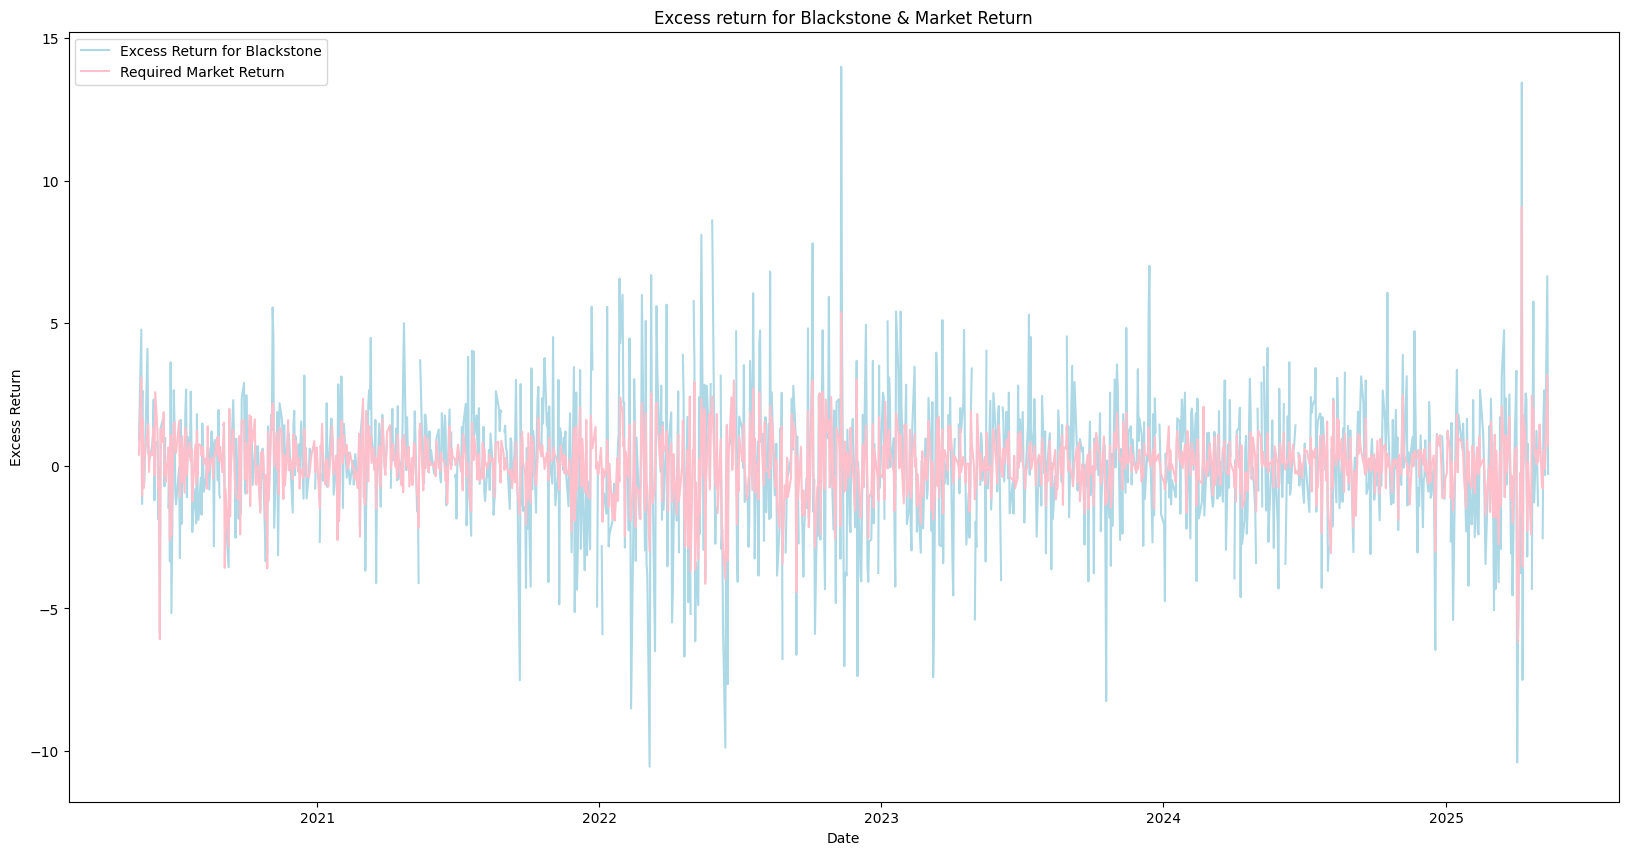

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(BX_CAPM['exr_BX'], label = 'Excess Return for Blackstone', color = 'lightblue')
plt.plot(BX_CAPM['exrsp'], label = 'Required Market Return', color = 'pink')
plt.title('Excess return for Blackstone & Market Return')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()
plt.show()


I could not interpret any visible relationship when using the line graph because of clutter data. Therefore, by referring to the text book, I created another figure using scatter plot.

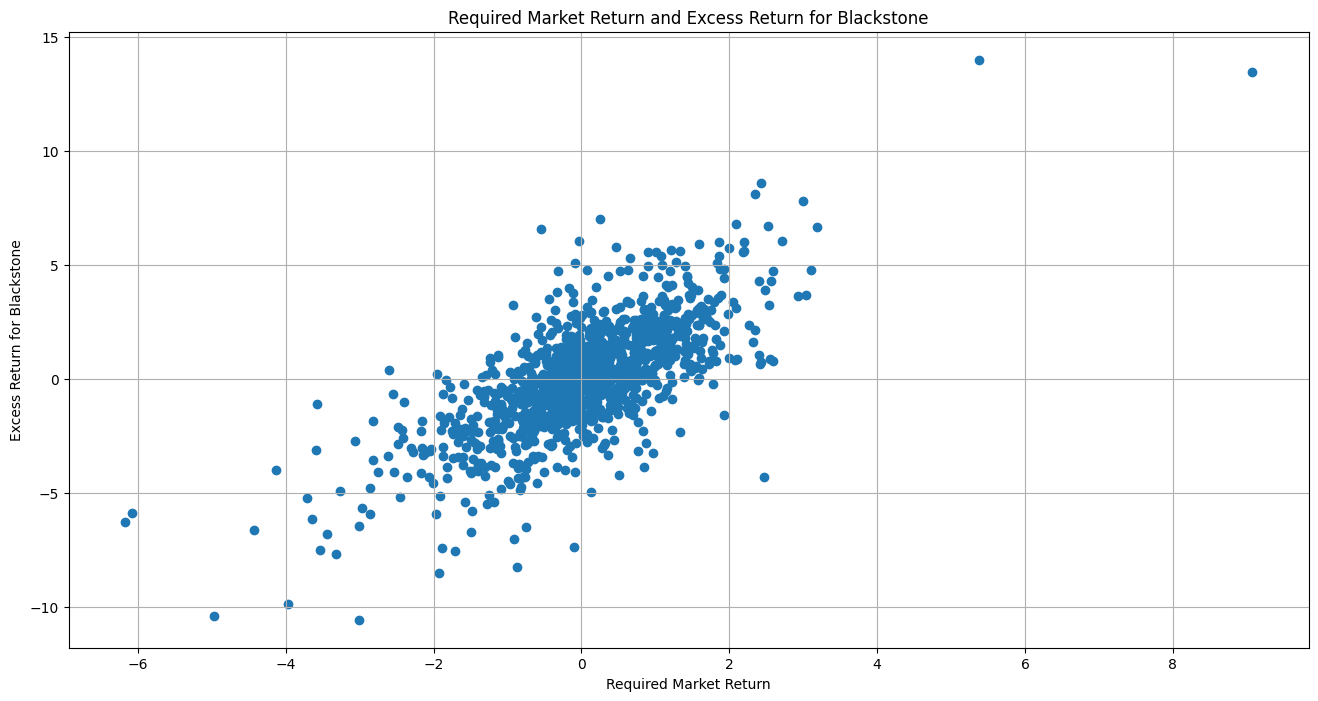

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data = BX_CAPM, x = 'exrsp', y = 'exr_BX')
plt.xlabel('Required Market Return')
plt.ylabel('Excess Return for Blackstone')
plt.title('Required Market Return and Excess Return for Blackstone')
plt.grid(True)
plt.show()

Overall, there is seemingly a positive relationship between Blackstone's excess return and market's performance.

In [ ]:
formula_Blackstone = 'exr_BX ~ exrsp'
CAPM_Blackstone = smf.ols(formula = formula_Blackstone, data = BX_CAPM).fit()
print(CAPM_Blackstone.summary())

                            OLS Regression Results                            
Dep. Variable:                 exr_BX   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1274.
Date:                Sun, 18 May 2025   Prob (F-statistic):          6.31e-191
Time:                        13:19:52   Log-Likelihood:                -2347.0
No. Observations:                1205   AIC:                             4698.
Df Residuals:                    1203   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.049      0.734      0.4

Overall, based on the OLS Regression Results, beta is estimated to be 1.5443 and a p-value of 0, which strongly indicates that Blackstone's stock price is more volatile than the market. Specifically, a 1% change in market return will correspond to a 1.54% change in Blackstone's stock in the same direction. However, although alpha is expected to be 0.0359, its p-value is 0.463, meaning that it's not really statistically significant.
About the model, an R-squared of 0.514 suggests that 51.4% of Blackstone’s excess return variance can be explained by market excess returns, a fairly high proportion. In addition to that, an extremely high F-statistic of 1274 proved the statistical significance of the model.

##Summary Of CAPM

I only detailedly displayed the table and graph for the first equity. From the second one, I will only present the CAPM Regression Results.

In [ ]:
def run_capm(ticker, market_returns, rf_daily):
    ret = x_returns(ticker)
    df = pd.DataFrame({
        'return_stock': ret,
        'return_market': market_returns['^GSPC'],
        'risk_free': rf_daily['^FVX']
    }).dropna()
    df['exr_stock'] = df['return_stock'] - df['risk_free']
    df['exr_market'] = df['return_market'] - df['risk_free']
    model = smf.ols(formula='exr_stock ~ exr_market', data=df).fit()
    return {
        'Ticker': ticker,
        'Alpha': float(model.params['Intercept']),
        'Beta': float(model.params['exr_market']),
        'R_squared': float(model.rsquared),
    }

In [ ]:
capm_results = [run_capm(ticker, market_returns, rf_daily) for ticker in tickers]
capm_df = pd.DataFrame(capm_results)
capm_df = capm_df.sort_values(by='Beta', ascending=True).reset_index(drop=True)
print(capm_df)

       Ticker     Alpha      Beta  R_squared
0       PSH.L  0.042159  0.488903   0.115204
1   INVE-B.ST  0.059617  0.499938   0.171990
2       SDR.L -0.052148  0.510100   0.104036
3      MNKS.L -0.003649  0.540076   0.197272
4       STJ.L -0.005451  0.576879   0.075424
5         RJF  0.063969  1.083893   0.396139
6         BLK  0.010799  1.160632   0.587999
7         STT  0.006736  1.193183   0.390076
8         AMP  0.070504  1.246631   0.544664
9          BN  0.014476  1.365910   0.552700
10       ARES  0.087312  1.410631   0.507220
11        APO  0.049818  1.455069   0.467398
12         BX  0.035928  1.544281   0.514405
13         CG -0.001344  1.579191   0.503589
14        KKR  0.069790  1.600973   0.536570


Considering all factors, including Sharpe Ratio, Sortino Ratio, and CAPM Regression, as a risk-averse investor, I would choose Investor AB (INVE-B.ST) as the most optimal investment choice. First, it has a relatively small beta (approximately 0.172), indicating a stable return compared to the market as a whole. In addition to that, its alpha is also positive (0.0596), which suggests that INVE-B.ST has the ability to generate excess return. Finally, solid Sharpe(0.795) and Sortino Ratio (1.128) reinforce this equity's strong risk-adjusted performance, both in terms of overall and downside risk.

##Statistical Robustness Test

I will choose Blackstone (BX) for all the statistical robustness test because among all the firms, only the CAPM regression for this equity is a global variable.

### Heteroscedasticity

As I did some research, there are two most common tests for Heteroscedasticity: the White Test and Breusch-Pagan test. Although the Breush-Pagan test might be easier to compute, I realized that this approach assumes the variance of the errors is a linear function of the independent variables. Therefore, I want to try both tests for better robustness.

In [ ]:
#Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = CAPM_Blackstone.resid
exog = CAPM_Blackstone.model.exog
bp_test = het_breuschpagan(residuals, exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(0.26583238557404576), 'p-value': np.float64(0.606141244912981), 'f-value': np.float64(0.2654497302744097), 'f p-value': np.float64(0.6064952522334661)}


In [ ]:
#White Test
from statsmodels.stats.diagnostic import het_white
residuals = CAPM_Blackstone.resid
exog = CAPM_Blackstone.model.exog
white_test = het_white(residuals, exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(17.434118680470807), 'Test Statistic p-value': np.float64(0.00016376806969812814), 'F-Statistic': np.float64(8.823009730896553), 'F-Test p-value': np.float64(0.0001570614603668961)}


The worst scenario has happened. According to the Breusch-Pagan test, p-value is 0.6, a large number, so there is no evidence of heteroskedascity. However, when evaluating with the White Test, p-value is only 0.00016, significantly lower than 0.05 and indicating the detection of heteroskedasticity (not in the form of linear heteroskedasticity). As a result, we need to continue with robust standard errors in this case. Given a medium sample size of 1205, I will use HC1 as the version of heteroskedasticity-consistent standard error estimators.

In [ ]:
CAPM_Blackstone_robust = CAPM_Blackstone.get_robustcov_results(cov_type='HC1').summary()
print(CAPM_Blackstone_robust)

                            OLS Regression Results                            
Dep. Variable:                 exr_BX   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     771.1
Date:                Sun, 18 May 2025   Prob (F-statistic):          1.51e-131
Time:                        13:19:52   Log-Likelihood:                -2347.0
No. Observations:                1205   AIC:                             4698.
Df Residuals:                    1203   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.049      0.733      0.4

###Normality of Residuals

From what I understand, there are two ways to check normality of residuals: visual inspection and Statistical Test. For visual inspection, Q-Q plot serves as a more precise diagnosis since it can detect skewness and tail deviations. Additionally, because of a medium sample size, for Statistical Test, I will choose the Jarque-Bera Test instead of the Shapiro-Wilk test (suitable for sample size <30).

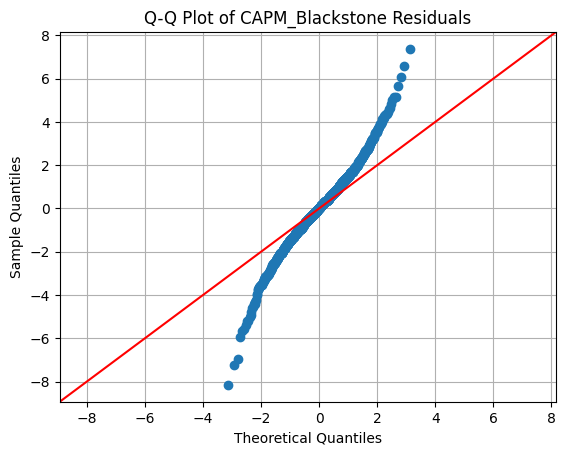

In [ ]:
#Q-Q plot
import statsmodels.api as sm
sm.qqplot(CAPM_Blackstone.resid, line='45')
plt.title('Q-Q Plot of CAPM_Blackstone Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [ ]:
# Jarque-Bera Test
from statsmodels.stats.stattools import jarque_bera
jb_stat, jb_p, _, _ = jarque_bera(CAPM_Blackstone.resid)
print(f"Jarque-Bera p-value: {jb_p}")

Jarque-Bera p-value: 6.762548559720117e-37


As shown in the Q-Q plot, the sample quantiles of the residuals curve away from the 45-degree line at both ends, indicating leptokurtosis (fat tails). Also, there is a slight asymmetry in the distribution of residuals, suggesting skewness. Furthermore,combined with a surprisingly small p-value of approximately 6.76e-37(even < 0.001) from the Jarque-Bera Test, it is confirmed that the CAPM residuals are not normally distributed. To improve this issue, I think the best way is to switch to more complicated models such as Fama-French 3-factor.


###Outlier and Influential Points

For a highly volatile data like stock price returns, I will try to detect whether there are some outliers which distorted the model. Cook's Distance is considered the most comprehensive method for this evaluation since it takes both residual size and leverage into consideration.

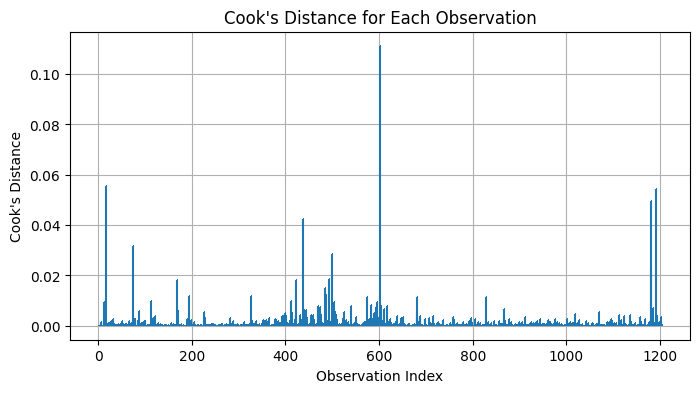

Influential points (Cook's D > 0.0033): [13, 17, 74, 87, 112, 122, 169, 171, 195, 227, 327, 393, 395, 398, 401, 412, 414, 422, 423, 432, 438, 440, 443, 444, 454, 459, 469, 470, 474, 476, 484, 487, 493, 500, 503, 505, 508, 525, 539, 551, 575, 582, 590, 593, 596, 602, 604, 605, 610, 616, 639, 651, 680, 681, 687, 715, 758, 828, 866, 867, 912, 1019, 1070, 1113, 1123, 1136, 1158, 1180, 1181, 1184, 1185, 1186, 1191, 1193, 1203]
Number of influential points: 75


In [ ]:
import matplotlib.pyplot as plt
influence = CAPM_Blackstone.get_influence()
cooks_dist = influence.cooks_distance[0]
plt.figure(figsize=(8, 4))
plt.stem(cooks_dist, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()
n = len(cooks_dist)
threshold = 4/n
influential_points = [i for i, val in enumerate(cooks_dist) if val > threshold]
print(f"Influential points (Cook's D > {threshold:.4f}): {influential_points}")
print(f'Number of influential points: {len(influential_points)}')

As the result showed, there are a total of 75 influential points, a pretty large number, which might potentially distort my CAPM model. Some might suggest removing extreme influential points to improve the model. However, in my opinion, in stock market data,  influential points often correspond to real, important events such as crashes and new shocks. Ignoring or removing them outright can throw away valuable information and bias the model. Therefore, to refrain from the risk of losing important data, I suggest using more complex models, especially the ones that are designated for capturing financial volatility such as GARCH.

###Autocorrelation

Based on external resources, there are two types of tests for autocorrelation for linear-regression, time-series models: Durbin-Watson and Breusch-Godfrey. Although the Breusch-Godfrey is preferred, I feel like it is too complicated for a basic, one independent variable model like CAPM (just my subjective opinion). Because Breusch-Godfrey allows for lagged dependent variables and higher-order autocorrelation, it will be a suitable choice for models like AR I think. Nonetheless, since it is a practice assignment, I will try to use both of them :>>

In [ ]:
# Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(CAPM_Blackstone.resid)
print(f'Durbin-Watson statistic: {dw_stat:.4f}')

Durbin-Watson statistic: 2.0006


DW = 2 suggests there is no autocorrelation at lag 1. Next, I will continue with Breush-Godfrey, using nlags = 5( number of trading days per week).

In [ ]:
#Breusch-Godfrey
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
bg_test = acorr_breusch_godfrey(CAPM_Blackstone, nlags=5)
labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
print(dict(zip(labels, bg_test)))

{'LM Statistic': np.float64(2.9688715065232434), 'LM p-value': np.float64(0.7047851074162924), 'F-Statistic': 0.5917830213385741, 'F p-value': 0.7063123706345262}


P-value = 0.706, much higher than 0.05. It is confirmed that there is no autocorrelation among CAPM residuals, even up to 5 days. Finally a great news I guess.

###Stability / Structural Breaks

For financial data that is highly sensitive to evolving market conditions—such as the impacts from the COVID-19 pandemic or trade policies during the Trump administration—it is essential to rigorously test for structural breaks in the model. This ensures that our risk-return relationship remains robust and accurately reflects changing economic regimes. While the Chow Test offers a straightforward method for detecting breaks at known points in time, the challenge lies in the uncertainty around precise break dates— I am not sure about the start date of the COVID-19 impact—and the likelihood of multiple influential events affecting Blackstone’s stock returns. Consequently, relying solely on the Chow Test would necessitate conducting multiple tests at various candidate breakpoints, which may complicate the analysis and increase the risk of multiple testing issues. Similarly, the CUSUM and CUSUMSQ tests do not identify the exact timing or number of breaks, so I decided to choose the Bai-Perron test.


In [ ]:
!pip install ruptures

In [ ]:
#Bai-Perron
import ruptures as rpt
residuals = CAPM_Blackstone.resid.values
model = "l2"
n_bkps = 5
algo = rpt.Pelt(model=model).fit(residuals)
breakpoints = algo.predict(pen=10)
print(f'Breakpoints indices', breakpoints)

Breakpoints indices [70, 380, 390, 395, 400, 410, 415, 480, 500, 505, 605, 620, 865, 875, 1000, 1010, 1205]


For the first trial, I think a lot of the break events are too close to each other (day 390 and 395, 410 and 415, 500 and 505, etc.). Therefore, I will modify the test by choosing a bigger pen.
n_bkps = 5 seems to be a good choice since I expect each year will have one break event, on average.

In [ ]:
breakpoints_mod = algo.predict(pen = 18)
date_index = CAPM_Blackstone.model.data.frame.index
break_dates = date_index[breakpoints_mod]
for i, (idx, date) in enumerate(zip(breakpoints, break_dates), 1):
    print(f"Breakpoint {i}: Index {idx} → Date {date.strftime('%Y-%m-%d')}")

Breakpoint 1: Index 70 → Date 2021-12-29
Breakpoint 2: Index 380 → Date 2022-01-05
Breakpoint 3: Index 390 → Date 2022-10-07
Breakpoint 4: Index 395 → Date 2022-10-28
Breakpoint 5: Index 400 → Date 2025-03-03


The multiple structural breakpoints clearly indicate that Blackstone’s systematic risk profile is not stable over time. In fact, each detected break coincides closely with the release of the firm’s quarterly earnings, suggesting that Blackstone’s beta—and potentially its alpha—tends to shift around those announcement dates. As a result, for investors who rely on a risk-adjusted framework, they should be more cautious around Blackstone’s quarterly earnings dates, as the firm’s beta appears to vary significantly during these periods.